In [1]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("sharif.jpg",1)
mask=cv2.imread('mask.png',1)

In [2]:
def cloner(source,destination,mask=mask,manual=True,vis = True,full_image=False):
    
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    origninalsource = source.copy()
    
    # This piece of code handles the condition in which we als0 want the face image to be extracted
    if full_image:
        
        faces = face_cascade.detectMultiScale(source, 1.3, 5)        

        if len(faces) > 0:
            x,y,w,h=faces[0]
            source = source[y:y+h, x:x+w]

        # if face detection fails then maually crop out the image
        else:
            if manual:                
                r = cv2.selectROI(source)     
                source =  source[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
            else:
                return None
        
    # Load a generic mask that approximate an average face if no mask was provided
    if mask is None:
        mask = cv2.imread('commonmask.jpg',0 )

    # perform the face detection and extract the first face
    faces = face_cascade.detectMultiScale(destination, 1.3, 5)

    if len(faces) > 0:
        x,y,w,h=faces[0]
        faceroi = destination[y:y+h, x:x+w]
        # get the center of the face
        center_point = (x+w//2,y+h//2)

    # if face detection fails then maually crop out the image
    else:
        
        if manual: 
            r = cv2.selectROI(destination)   
            # get the width and height
            h = r[3]
            w = r[2]
            center_point = (x+w//2,y+h//2)
        else:
            return None

    # resize the source face and the mask according to the detected face
    size = (w+100,h+100)
    mask = cv2.resize(mask, size)
    source = cv2.resize(source, size)


    cloned_image_normal = cv2.seamlessClone(source, destination, mask, center_point, cv2.NORMAL_CLONE)
    Monochrome = cv2.seamlessClone(source, destination, mask, center_point, cv2.MONOCHROME_TRANSFER)

    if vis:
        plt.figure(figsize=[20,30])
        plt.subplot(221);plt.imshow(origninalsource[:,:,::-1]);plt.title("Source");plt.axis('off')
        plt.subplot(222);plt.imshow(destination[:,:,::-1]);plt.title("destination");plt.axis('off');
        plt.subplot(223);plt.imshow(cloned_image_normal[:,:,::-1]);plt.title("Normal Cloning");plt.axis('off')
        plt.subplot(224);plt.imshow(Monochrome[:,:,::-1]);plt.title("MonoChrome Transfer");plt.axis('off');

    return cloned_image_normal

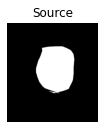

In [3]:
source = cv2.imread('sharif.jpg',1)
mask=cv2.imread('mask.png',1)


cap = cv2.VideoCapture(0)  

source = cv2.imread('sharif.jpg',1)


while (True):
    
    ret ,frame = cap.read()  
    if not ret:
        break
        
    frame = cv2.flip( frame, 1 )    
    cloned = cloner(source,frame,full_image=True,manual=False,vis=False)

    if cloned is None:
        cv2.imshow("img",frame)
    else:
        cv2.imshow("img",cloned)  
    
    k = cv2.waitKey(1)  & 0xFF

    if k == ord('q'):  
        break

    if k ==ord('s'):
        cv2.imwrite('mysavedpicc.jpg',cloned)
        cv2.imshow('Picture Saved',cloned)  
                     
cap.release()
cv2.destroyAllWindows()